# Plotting with Matplotlib

In this unit, revisit the topic of plotting numerical data. Python itself does not have any built-in
plotting capabilities, so we will be using [`matplotlib`](https://matplotlib.org/) (MPL),
the most popular graphics library for Python.

-   For details on a particular plotting function, see the
    [official documentation](https://matplotlib.org/stable/users/index.html).
-   There is an official introductory [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
    which you can use along-side this unit.

In order to access the functions and objects from matplotlib, we
first need to import them. The general convention is to use the
namespace `plt` for this purpose:

```python
import matplotlib.pyplot as plt
```

***
## Line plots

One of the simplest plots we can generate using the
[`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
function is a line defined by a list of $y$-values.

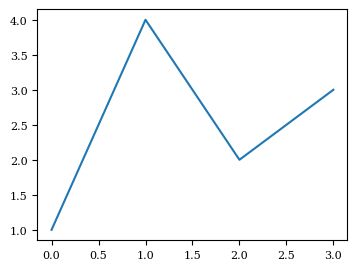

In [1]:
# import matplotlib library
import matplotlib.pyplot as plt

# Plot list of integers
yvalues = [1, 4, 2, 3]
plt.plot(yvalues)

We didn't even have to specify the corresponding $x$-values,
as MPL automatically assumes them to be [0, 1, 2, ...].
Usually, we want to plot for a given set of $x$-values like this:

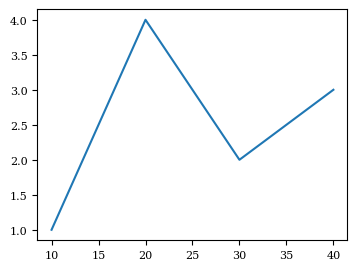

In [2]:
# explicitly specify x-values
xvalues = [10, 20, 30, 40]
plt.plot(xvalues, yvalues)

We can also specify multiple lines to be plotted in a single graph:

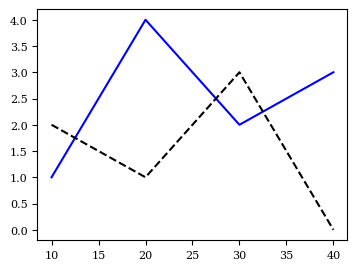

In [3]:
yvalues2 = [2.0, 1.0, 3.0, 0.0]
plt.plot(xvalues, yvalues, 'b-', xvalues, yvalues2, 'k--')

The characters following each set of $y$-values are style specifications.
The letters are short-hand notations for colors
(see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The remaining characters set the line styles. Valid values are

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

Additionally, we can append marker symbols to the style specification.
The most frequently used ones are

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

The whole list of supported symbols can be found [here](https://matplotlib.org/stable/api/markers_api.html).

Instead of passing multiple values to be plotted at once, 
we can also repeatedly call `plot()` to add additional elements to a graph. 
This is more flexible since we can pass additional arguments which are 
specific to one particular set of data, such as labels displayed in legends.

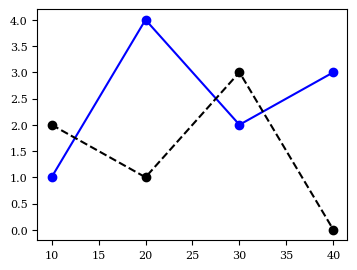

In [4]:
# Plot two lines by calling plot() twice
plt.plot(xvalues, yvalues, 'b-o')
plt.plot(xvalues, yvalues2, 'k--o')

Individual calls to `plot()` also allow us to specify styles
more explicitly using keyword arguments:

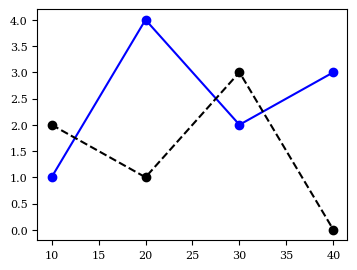

In [5]:
# pass plot styles as explicit keyword arguments
plt.plot(xvalues, yvalues, color='blue', linestyle='-', marker='o')
plt.plot(xvalues, yvalues2, color='black', linestyle='--', marker='o')

Note that in the example above, we use named colors such as `'red'` or `'blue'` (see 
[here](https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors) for the complete list of named colors). 

Matplotlib accepts abbreviations for the most common 
style definitions using the following shortcuts:

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`

We can write thus rewrite the above code as follows:

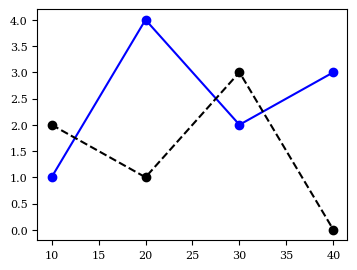

In [6]:
# abbreviate plot style keywords
plt.plot(xvalues, yvalues, c='blue', ls='-', marker='o')
plt.plot(xvalues, yvalues2, c='black', ls='--', marker='o')

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain the 1-year real interest rate and the Federal Funds rate at monthly frequency.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Plot the <TT>REALRATE</TT> using a blue dashed line with line width 0.5 and <TT>FEDFUNDS</TT> using an orange line with line width 0.75 in the <i>same</i> figure.</li>
</ol>
</div>

***
## Scatter plots

We use the [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) 
function to create scatter plots in a similar fashion to line plots:

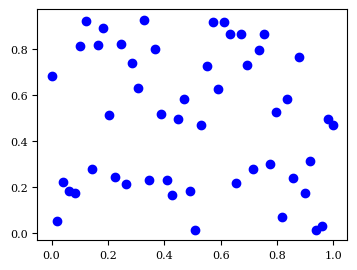

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create 50 uniformly-spaced values on unit interval
xvalues = np.linspace(0.0, 1.0, 50)
# Draw random numbers 
yvalues = np.random.default_rng(123).random(50)

plt.scatter(xvalues, yvalues, color='blue')

We could in principle create scatter plots using `plot()` by turning
off the connecting lines. However, `scatter()` allows
us to specify the color and marker size as collections, so
we can vary these for every point. `plot()`, on the other hand, imposes
the same style on all points plotted in that particular function call.

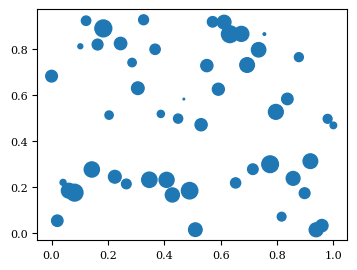

In [8]:
# Draw random marker sizes
size = np.random.default_rng(456).random(len(yvalues)) * 150.0

# plot with point-specific marker sizes
plt.scatter(xvalues, yvalues, s=size)

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>REALRATE.csv</TT> and <TT>FEDFUNDS.csv</TT> into two different DataFrames.
        The files contain the 1-year real interest rate and the Federal Funds rate at monthly frequency.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Create a scatter plot of <TT>REALRATE</TT> (on the y-axis) against <TT>FEDFUNDS</TT> (on the x-axis).
    Specify the arguments <TT>edgecolors='blue'</TT> and <TT>color='none'</TT> to plot the data as blue rings.
    <br/>
    <i>Hint:</i> <TT>scatter()</TT> requires the arguments to be of equal length, which is not the case here.
    Restrict the data to the same time period, for example by using <TT>join(..., how='inner')</TT>.
    </li>
</ol>
</div>

***
## Plotting categorical data

Instead of numerical values on the $x$-axis, we can also plot categorical
variables using the function [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

For example, assume we have four categories and each has an associated
numerical value:

Text(0, 0.5, 'In thousand')

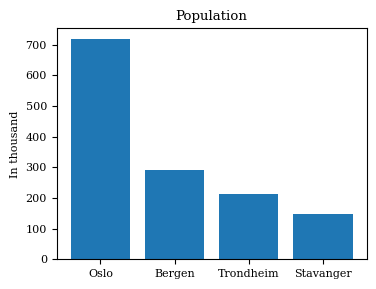

In [9]:
import matplotlib.pyplot as plt

# Define category labels
municipality = ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
# Population in thousand
population = np.array([717710, 291940,  214565, 149048]) / 1000

# Create bar chart
plt.bar(municipality, population)

# Add overall title
plt.title('Population')
plt.ylabel('In thousand')

We use [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) to create *horizontal* bars:

Text(0.5, 0, 'In thousand')

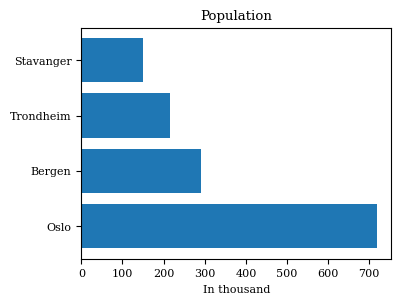

In [10]:
plt.barh(municipality, population)
plt.title('Population')
plt.xlabel('In thousand')

***
## Adding labels and annotations

Matplotlib has numerous functions to add labels and annotations:

-   Use [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) 
    and [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) 
    to add titles.
    The latter adds a title for the whole figure, which might
    span multiple plots (axes).
-   We can add axis labels by calling 
    [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) 
    and [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).
-   To add a legend, call 
    [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html), which in its most simple
    form takes a list of labels which are in the same order
    as the plotted data.
-   Use [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)
    to add additional text at arbitrary locations.

Text(0.05, 0.05, 'More text')

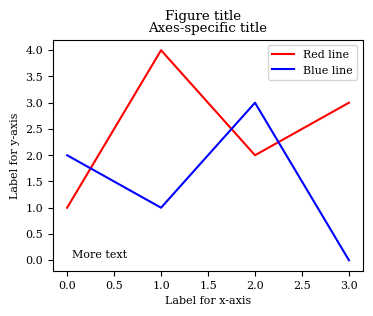

In [11]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, 'r', xvalues, yvalues2, 'b')
plt.suptitle('Figure title')
plt.title('Axes-specific title')
plt.xlabel('Label for x-axis')
plt.ylabel('Label for y-axis')
plt.legend(['Red line', 'Blue line'])

# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, 'More text')

***
## Plot limits, ticks and tick labels

We adjust the plot limits, ticks and tick labels as follows:

-   Plotting limits are set using the 
    [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and 
    [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) functions.
    Each accepts a tuple `(min,max)` to set the desired range.
-   Ticks and tick labels can be set by calling 
    [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) 
    or [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html).


(-1.1, 1.1)

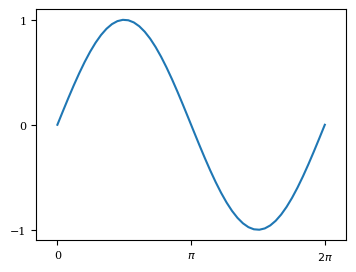

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xvalues = np.linspace(0.0, 2*np.pi, 50)
plt.plot(xvalues, np.sin(xvalues))

# Set major ticks for x and y axes, and xtick labels.
# We can use LaTeX code in labels!
plt.xticks([0.0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$'])
plt.yticks([-1.0, 0.0, 1.0])

# Adjust plot limits in x and y direction
plt.xlim((-0.5, 2*np.pi + 0.5))
plt.ylim((-1.1, 1.1))


***

## Adding straight lines

Quite often, we want to add horizontal or vertical lines to highlight a particular value. We can do this using the functions

- [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) to add a *horizontal* line at a given $y$-value.
- [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) to add a *vertical* line at a given $x$-value.
- [`axline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline) to add a line defined by two points or by a single point and a slope.

*Example: Adding horizontal and vertical lines*

Consider the sine function from above. We can add a horizontal line at 0 and two vertical lines at the points where the function attains its minimum and maximum as follows:

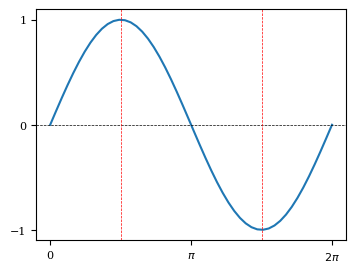

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot sine function (same as above)
xvalues = np.linspace(0.0, 2*np.pi, 50)
plt.plot(xvalues, np.sin(xvalues))
plt.xticks([0.0, np.pi, 2*np.pi], ['0', r'$\pi$', r'$2\pi$'])
plt.yticks([-1, 0, 1])

# Add black dashed horizontal line at y-value 0
plt.axhline(0.0, lw=0.5, ls='--', c='black')

# Add red dashed vertical lines at maximum / minimum points
plt.axvline(0.5*np.pi, lw=0.5, ls='--', c='red')
plt.axvline(1.5*np.pi, lw=0.5, ls='--', c='red')

***
## Object-oriented interface

So far, we have only used the so-called `pyplot` interface which involves
calling *global* plotting functions from `matplotlib.pyplot`.
This interface is intended to be similar to Matlab, but is also somewhat
limited and less clean.

We can instead use the object-oriented interface
(called this way because we call methods of the 
[`Figure`](https://matplotlib.org/stable/api/figure_api.html) and 
[`Axes`](https://matplotlib.org/stable/api/axes_api.html) objects).
While there is not much point in using the object-oriented interface
in a Jupyter notebook when we want to create a single graph, it should be the preferred method when
writing re-usable code in Python files.

To use the object-oriented interface, we need to get figure and
axes objects. The easiest way to accomplish this is using
the [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function, like this:
```python
fig, ax = plt.subplots()
```
As an example, we recreate the graph from the section on
labels and annotations using the object-oriented interface:

Text(0.05, 0.05, 'More text')

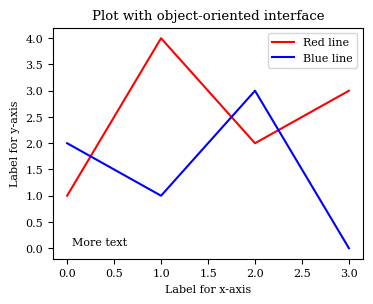

In [14]:
import matplotlib.pyplot as plt

xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

fig, ax = plt.subplots()
ax.plot(xvalues, yvalues, color='red', label='Red line')
ax.plot(xvalues, yvalues2, color='blue', label='Blue line')
ax.set_xlabel('Label for x-axis')
ax.set_ylabel('Label for y-axis')
ax.legend()
ax.set_title('Plot with object-oriented interface')
ax.text(0.05, 0.05, 'More text')


The code is quite similar, except that attributes are set using
the `set_xxx()` methods of the `ax` object. For example,
instead of calling `xlim()`, we use 
[`ax.set_xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).

***
## Working with multiple plots (axes)

The object-oriented interface becomes particularly useful
if we want to create multiple axes (or figures). This can also be achieved
using the `pyplot` programming model but is somewhat more obscure.

For example, to create a row with two subplots, we use:

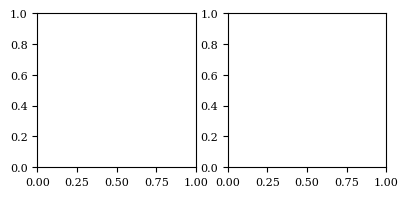

In [15]:
import matplotlib.pyplot as plt

# Create one figure with 2 axes objects, arranged as two columns in a single row
fig, ax = plt.subplots(1, 2, figsize=(4.5, 2.0))

With multiple axes objects in a single figure (as in the above example), the `ax` returned
by `subplots()` is a NumPy array. Its elements
map to the individual panels within the figure in a natural way.

We can visualise this mapping for the case of a single row
and two columns as follows:

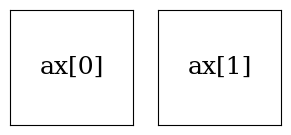

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(3.5,1.5))
for i, axes in enumerate(ax):
    # Turn off ticks of both axes
    axes.set_xticks(())
    axes.set_yticks(())
    # Label axes object
    text = f'ax[{i}]'
    axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', 
        ha='center', fontsize=18)

Don't worry about the details of how this graph is generated, the only take-away here is
how axes objects are mapped to the panels in the figure.

If we request panels in two dimensions, the `ax` object will be a 2-dimensional
array, and the mapping of axes objects to panels will look like this instead:

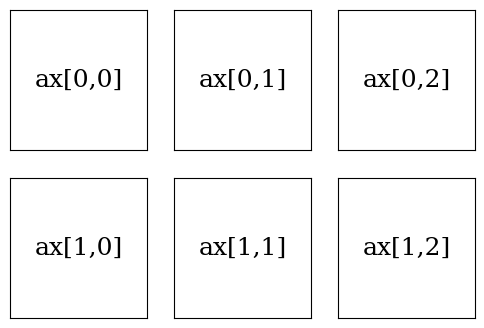

In [17]:
# Request figure with 2 rows, 3 columns
fig, ax = plt.subplots(2, 3, figsize=(6,4))
for i, axrow in enumerate(ax):
    for j, axes in enumerate(axrow):
        # Turn off ticks of both axes
        axes.set_xticks(())
        axes.set_yticks(())
        # Label axes object
        text = f'ax[{i},{j}]'
        axes.text(0.5, 0.5, text, transform=axes.transAxes, va='center', 
            ha='center', fontsize=18)

*Example: Create a plot with 2 panels*

We can use the elements of `ax` to plot into individual panels:

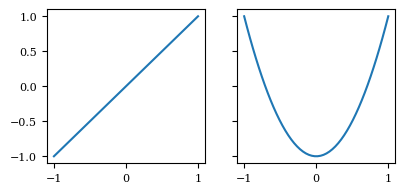

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(4.5, 2.0))
xvalues = np.linspace(-1.0, 1.0, 50)

# Plot into first column
ax[0].plot(xvalues, xvalues)

# Plot into second column
ax[1].plot(xvalues, 2*xvalues**2.0 - 1)

*Example: Create a figure with 2 rows and 2 columns*

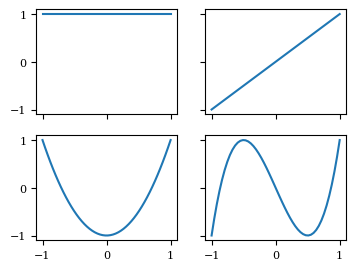

In [19]:
# create figure with 2 rows, 2 columns
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot the first four Chebyshev polynomials on the interval [-1,1]
for i in range(2):
    for j in range(2):
        yvalues = np.cos((j + i*2) * np.arccos(xvalues))
        ax[i,j].plot(xvalues, yvalues)

Note the use of `sharex=True` and `sharey=True`. This tells
matplotlib that all axes share the same plot limits, so the
tick labels can be omitted in the figure's interior to
preserve space.

***
# Plotting with pandas

Pandas does not implement its own graphics library, but provides convenient (albeit also limited) wrappers around Matplotlib functions that can be used to quickly visualize data stored in DataFrames. Alternatively, we can extract the numerical data and pass it to Matplotlib's routines manually.

## Bar charts

Let's return to our municipality population data.
To plot population numbers as a bar chart, we can directly use pandas's
[`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html):

<Axes: xlabel='Municipality'>

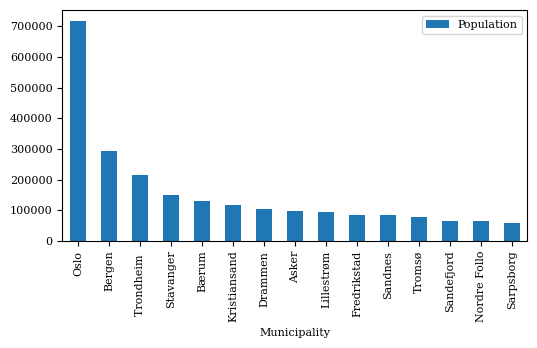

In [20]:
import pandas as pd 

# Path to local data/ folder
DATA_PATH = '../data'

# Read in population data for Norwegian municipalities
df = pd.read_csv(f'{DATA_PATH}/population_norway.csv')

# Keep only the first 15 observations
df = df.iloc[:15]

# Create bar chart, specify figure size
df.plot.bar(x='Municipality', y='Population', figsize=(6,3))

Alternatively, we can construct the graph ourselves using Matplotlib:

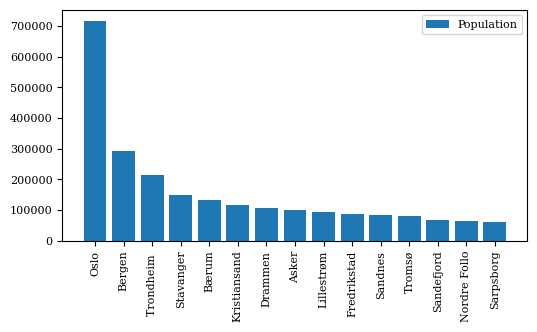

In [21]:
import matplotlib.pyplot as plt

# Extract municipality names
labels = df['Municipality']

# Extract population numbers
values = df['Population']

# Create new figure with desired size
plt.figure(figsize=(6, 3))

# Create bar chart
plt.bar(labels, values)

# Add legend
plt.legend(['Population'])

# Rotate ticks
plt.tick_params(axis='x', labelrotation=90)

Sometimes Matplotlib's routines directly work with pandas's data structures,
sometimes they don't. In cases where they don't, we can convert a `DataFrame` or `Series` object
to a NumPy array using the 
[`to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) 
method.

***
## Plotting time series data

To plot time series data, we can use the 
[`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 
method which optionally accepts arguments to specify which columns
should be used for the $x$-axis and which for the $y$-axis. We illustrate
this using the US unemployment rate at annual frequency.

<Axes: xlabel='Year', ylabel='Unemployment rate (%)'>

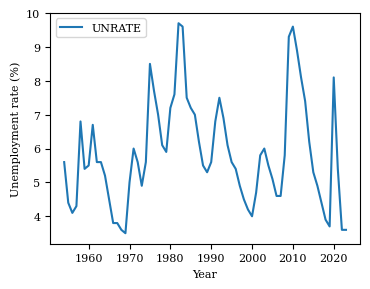

In [22]:
import numpy as np
import pandas as pd

# Path to FRED.csv; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

# Plot unemployment rate by year
df.plot(x='Year', y='UNRATE', ylabel='Unemployment rate (%)')

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../data</TT> to perform the following tasks:
<ol>
    <li>Load the macroeconomic time series data from <TT>FRED.csv</TT>.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'])</TT> to automatically set parse strings as dates.
        </li>
    <li>Create a line plot, showing both the unemployment rate <TT>UNRATE</TT>
        and the inflation rate <TT>INFLATION</TT> in a single graph.
    </li>
</ol>
</div>

***
## Scatter plots

Using the [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) method, 
we can generate scatter plots, plotting one column
against another. To illustrate, we plot the US unemployment rate against
inflation in any given year over the post-war period.

Note that you can pass additional arguments to pandas's version of `scatter()` which are passed on to Matplotlib's 
[`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html), for example `edgecolors`.

<Axes: xlabel='Unemployment rate', ylabel='Inflation'>

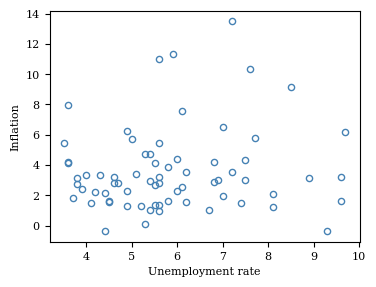

In [23]:
# Path to FRED.csv; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

# Compute annual inflation as growth rate of CPI
df['Inflation'] = df['CPI'].pct_change() * 100.0

df.plot.scatter(
    x='UNRATE', 
    y='Inflation', 
    color='none', 
    edgecolors='steelblue',
    xlabel='Unemployment rate'
)

Pandas also offers the convenience function 
[`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)
which lets us easily create pairwise scatter plots for more than two variables:

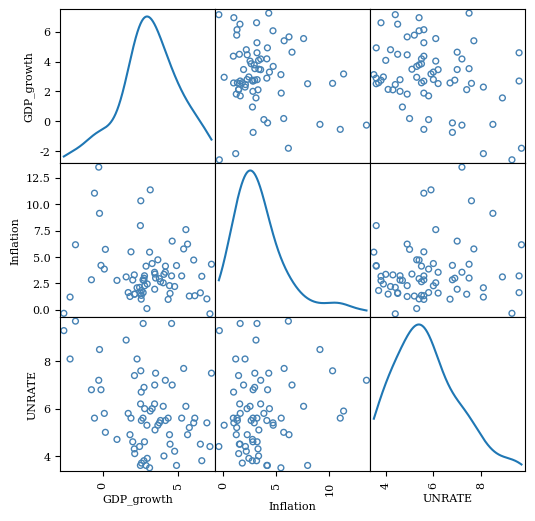

In [24]:
from pandas.plotting import scatter_matrix

# Continue with DataFrame from previous example, compute GDP growth
df['GDP_growth'] = df['GDP'].pct_change() * 100.0

# Columns to include in plot
columns = ['GDP_growth', 'Inflation', 'UNRATE']

# Use argument diagonal='kde' to plot kernel density estimate
# in diagonal panels
axes = scatter_matrix(
    df[columns], 
    figsize=(6, 6),
    diagonal='kde',             # plot kernel density along diagonal
    s=70,                       # marker size
    color='none', 
    edgecolors='steelblue', 
    alpha=1.0, 
)


***
## Box plots

To quickly plot some descriptive statistics, we can use the 
[`DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
provided by pandas. We demonstrate this by plotting the distribution
of post-ware GDP growth, inflation and the unemployment rate in the US:

<Axes: ylabel='Relative change in % (annual)'>

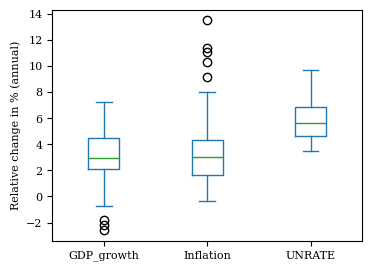

In [25]:
import numpy as np
import pandas as pd

# Path to FRED.csv; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

# Compute annual growth rates (in percent)
df['GDP_growth'] = df['GDP'].pct_change() * 100.0
df['Inflation'] = df['CPI'].pct_change() * 100.0

# Include only the following columns in plot
columns = ['GDP_growth', 'Inflation', 'UNRATE']

# Create box plot. Alternatively, use df.plot(kind='box')
df[columns].plot.box(ylabel='Relative change in % (annual)')